In [1]:
import numpy as np

In [2]:
import pandas as pd

## Reading Dataset

In [3]:
data = pd.read_csv("hypothetical_pump_failure_dataset.csv")

In [4]:
data

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
0,2024-01-01 00:00:00,0.549671,76.996777,93.248217,40.460962,0
1,2024-01-01 01:00:00,0.486174,74.623168,98.554813,45.698075,0
2,2024-01-01 02:00:00,0.564769,70.298152,92.075801,47.931972,0
3,2024-01-01 03:00:00,0.652303,66.765316,96.920385,59.438438,0
4,2024-01-01 04:00:00,0.476585,73.491117,81.063853,52.782766,0
...,...,...,...,...,...,...
995,2024-02-11 11:00:00,0.471890,75.350751,100.774805,50.142288,0
996,2024-02-11 12:00:00,0.679769,69.867394,102.577525,39.610941,1
997,2024-02-11 13:00:00,0.564084,65.590627,87.582394,48.398511,0
998,2024-02-11 14:00:00,0.442882,69.184665,103.341764,58.216891,0


## Checking nan values and datatypes of each column

In [5]:
# Display basic information and the first few rows of the dataset
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        1000 non-null   object 
 1   vibration_level  1000 non-null   float64
 2   temperature_C    1000 non-null   float64
 3   pressure_PSI     1000 non-null   float64
 4   flow_rate_m3h    1000 non-null   float64
 5   failure          1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


In [6]:
data_head = data.head()
data_head

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
0,2024-01-01 00:00:00,0.549671,76.996777,93.248217,40.460962,0
1,2024-01-01 01:00:00,0.486174,74.623168,98.554813,45.698075,0
2,2024-01-01 02:00:00,0.564769,70.298152,92.075801,47.931972,0
3,2024-01-01 03:00:00,0.652303,66.765316,96.920385,59.438438,0
4,2024-01-01 04:00:00,0.476585,73.491117,81.063853,52.782766,0


## Failure does has only 2 possibilities so it is binary classification problem

In [7]:
data["failure"].unique()

array([0, 1])

## Exploring Features

In [8]:
data["failure"].value_counts()

failure
0    951
1     49
Name: count, dtype: int64

In [9]:
data.describe()

,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.501933,70.354181,100.058342,49.906404,0.049000
std,0.097922,4.987272,9.834543,5.135663,0.215976
min,0.175873,55.298057,69.804878,35.352757,0.000000
25%,0.435241,66.968792,93.520004,46.312898,0.000000
50%,0.502530,70.315386,99.997492,50.000923,0.000000
75%,0.564794,73.644411,106.609153,53.334727,0.000000
max,0.885273,85.965538,139.262377,66.215465,1.000000


In [10]:
# !pip install -q scikit-learn

## Data Standardization using Sklearn StandardScaler Method

In [11]:
from sklearn.preprocessing import StandardScaler

# Selecting the features to be normalized/standardized
features = data[['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Creating a DataFrame for the scaled features
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Replacing the original features with the scaled versions in the dataset
data_scaled = data.copy()
data_scaled[['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']] = features_scaled_df

# Display the first few rows of the scaled dataset
data_scaled.head()


,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
0,2024-01-01 00:00:00,0.487759,1.332576,-0.692816,-1.840107,0
1,2024-01-01 01:00:00,-0.161022,0.856405,-0.152959,-0.819843,0
2,2024-01-01 02:00:00,0.642015,-0.011240,-0.812090,-0.384647,0
3,2024-01-01 03:00:00,1.536382,-0.719965,-0.319235,1.856976,0
4,2024-01-01 04:00:00,-0.258995,0.629303,-1.932372,0.560356,0


## Data Exploring Using Visualizations

Indicating Class Inbalance Issue using Pi chart


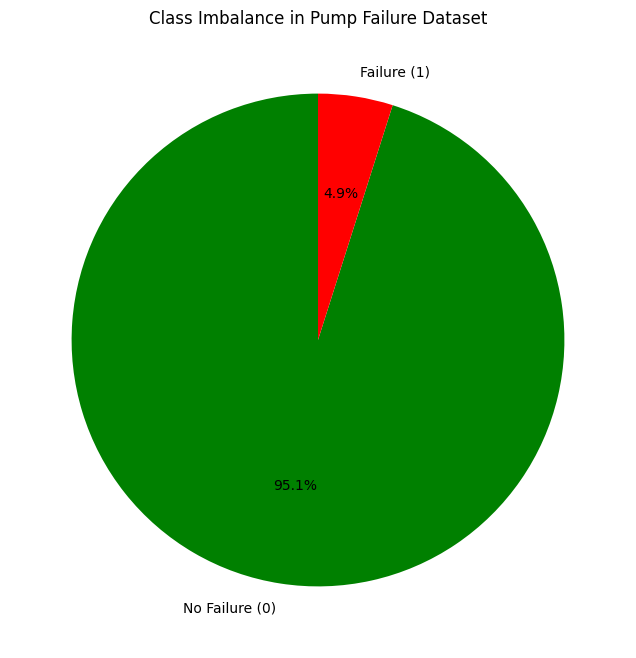

In [12]:
import matplotlib.pyplot as plt

# Count the occurrences of each class (0: No Failure, 1: Failure)
class_counts = data['failure'].value_counts()

# Plotting the class distribution as a pie chart
plt.figure(figsize=(10, 8))
plt.pie(class_counts, labels=['No Failure (0)', 'Failure (1)'], colors=['green', 'red'], autopct='%1.1f%%', startangle=90)
plt.title('Class Imbalance in Pump Failure Dataset')
plt.show()


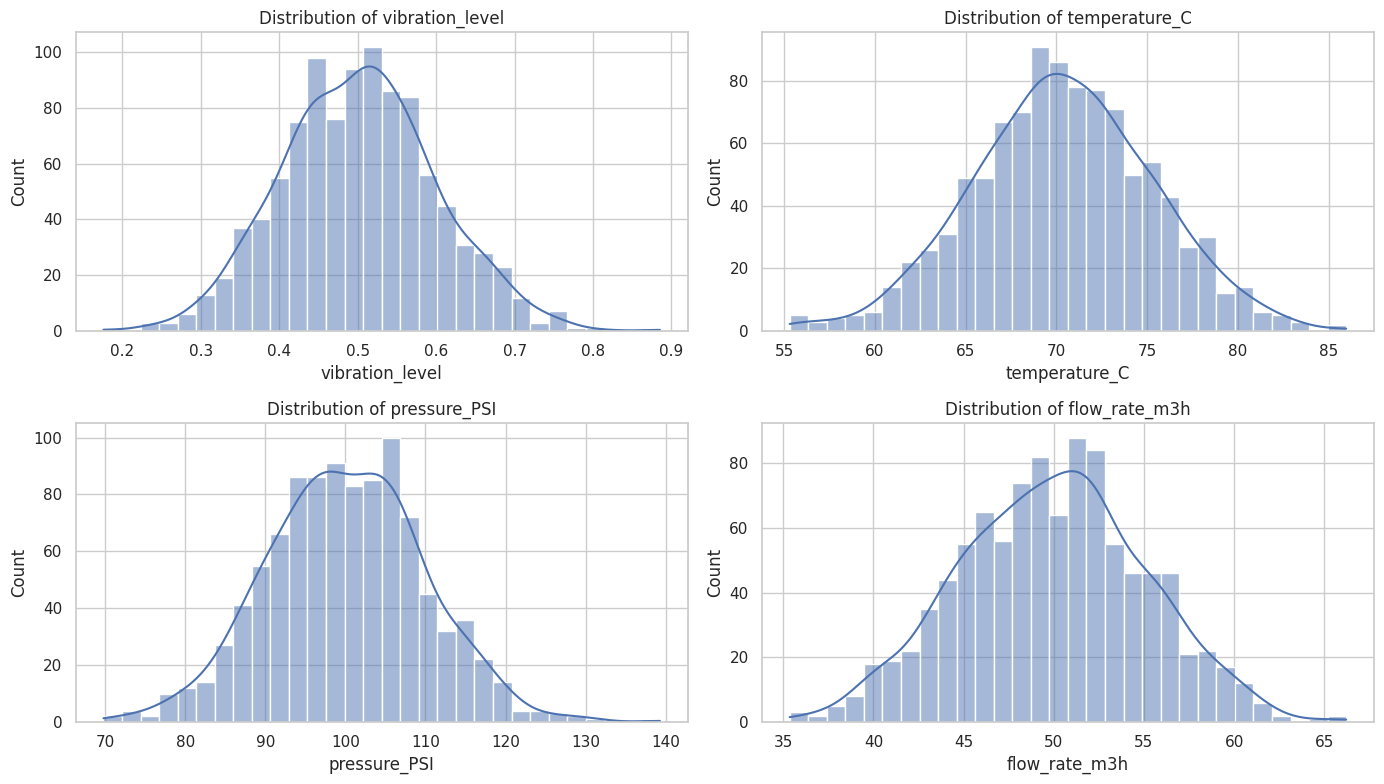

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Histograms for feature distributions
plt.figure(figsize=(14, 8))
for i, feature in enumerate(['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



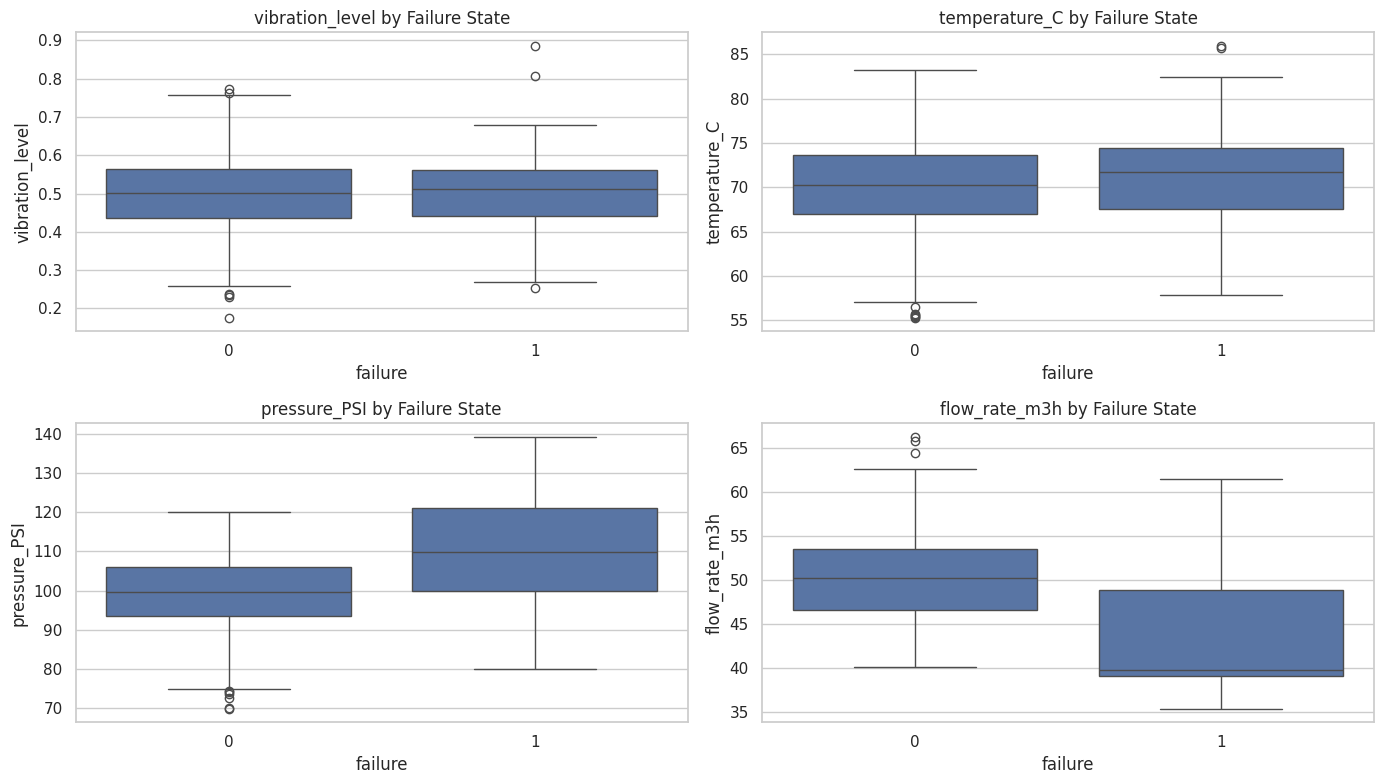

In [14]:
# 2. Box plots for each feature by failure state
plt.figure(figsize=(14, 8))
for i, feature in enumerate(['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='failure', y=feature, data=data)
    plt.title(f'{feature} by Failure State')
plt.tight_layout()
plt.show()



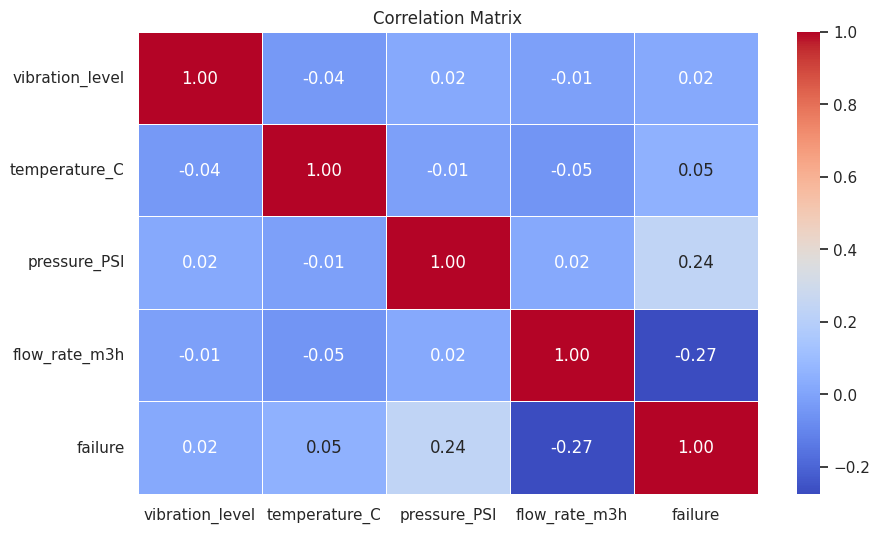

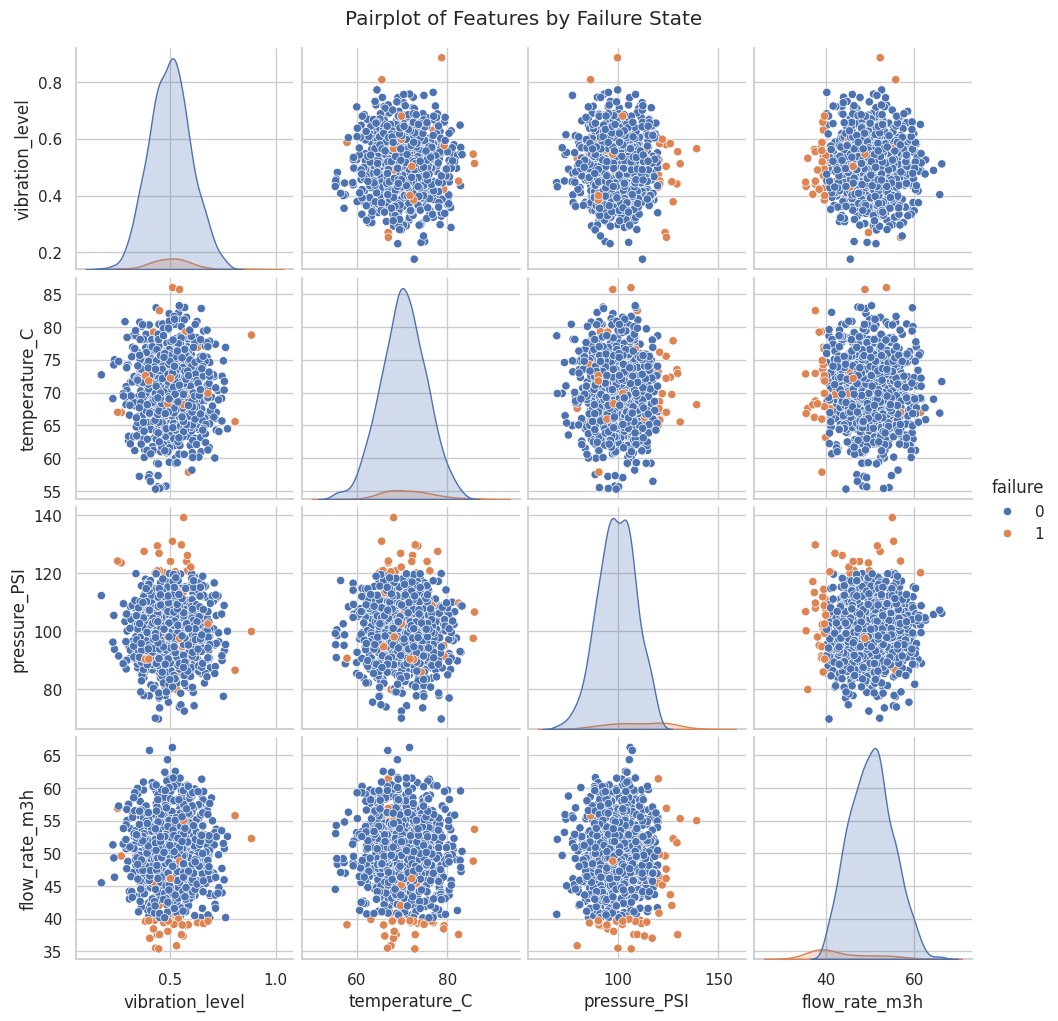

In [15]:
# 3. Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = data.drop(columns=['timestamp']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 4. Pairplot to visualize pairwise relationships
sns.pairplot(data.drop(columns=['timestamp']), hue='failure', diag_kind='kde')
plt.suptitle("Pairplot of Features by Failure State", y=1.02)
plt.show()



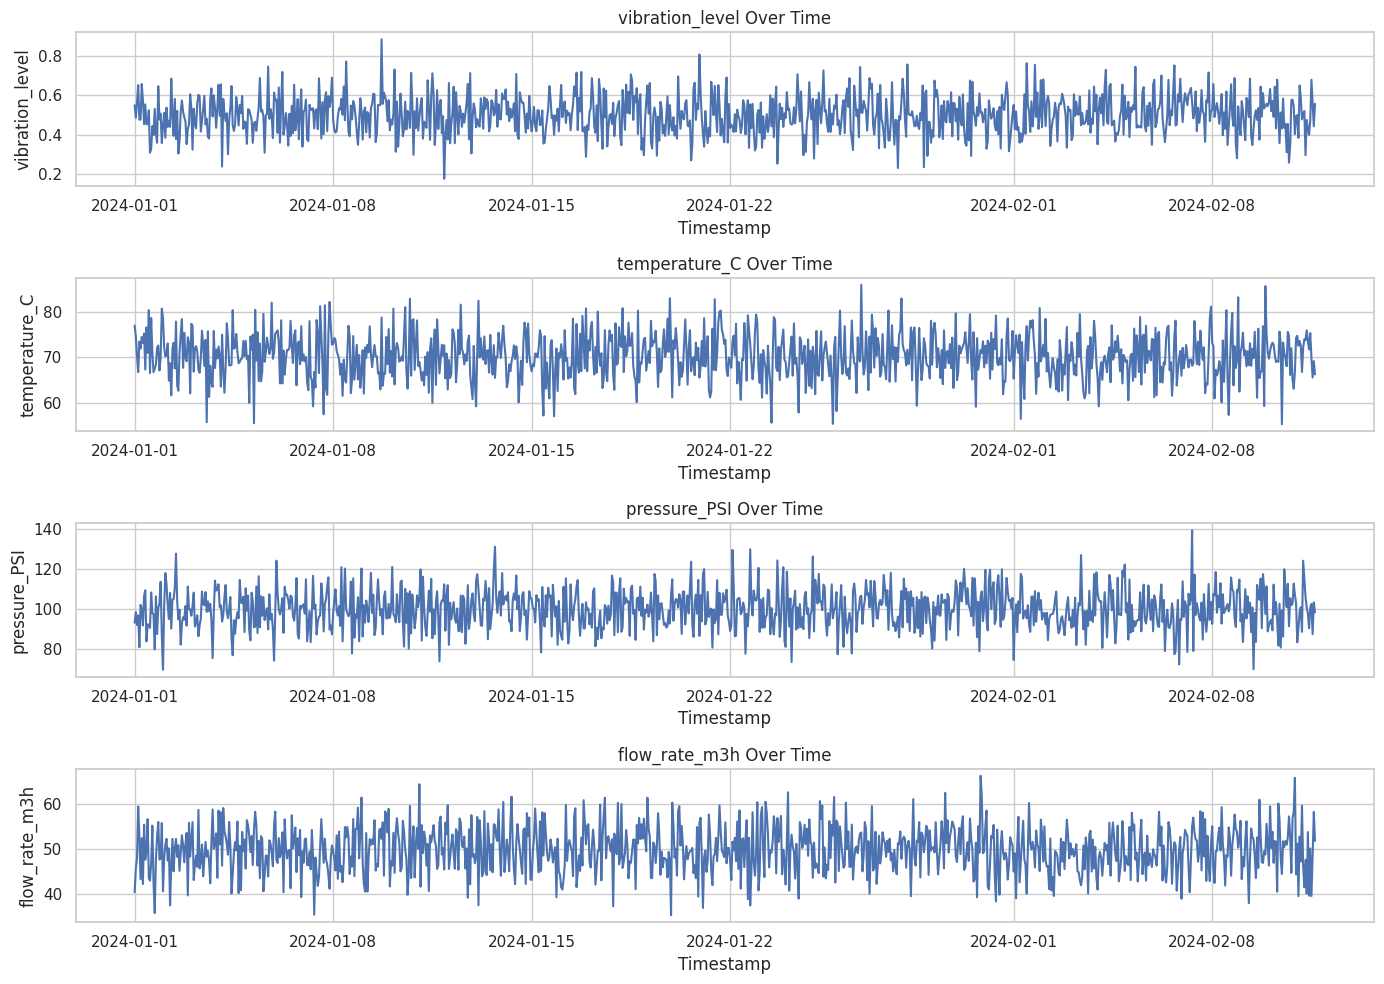

In [16]:
# 5. Time Series Analysis - Line plots over time
plt.figure(figsize=(14, 10))
for i, feature in enumerate(['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']):
    plt.subplot(4, 1, i + 1)
    plt.plot(pd.to_datetime(data['timestamp']), data[feature], label=feature)
    plt.title(f'{feature} Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(feature)
    plt.tight_layout()
plt.show()



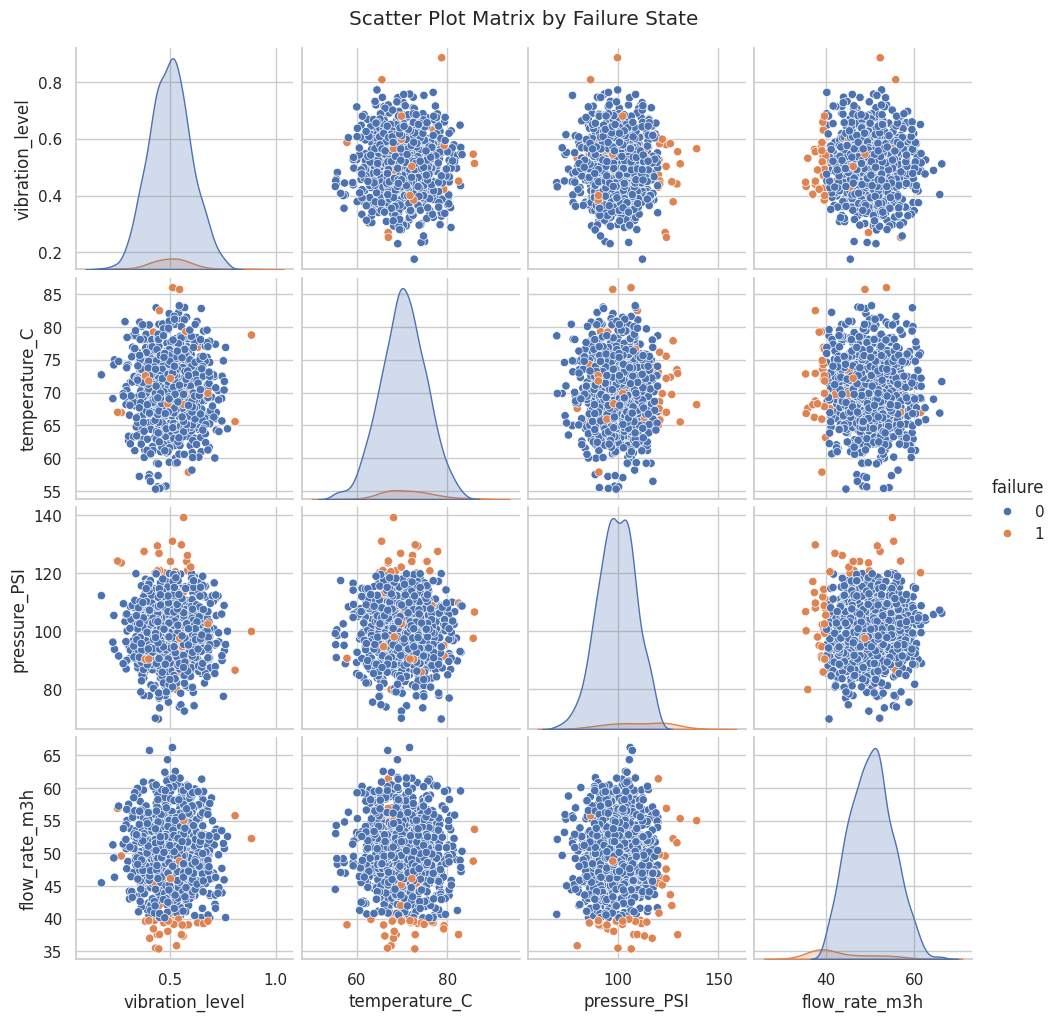

In [17]:
# 6. Scatter plot matrix
sns.pairplot(data, diag_kind='kde', markers="o", hue="failure")
plt.suptitle("Scatter Plot Matrix by Failure State", y=1.02)
plt.show()



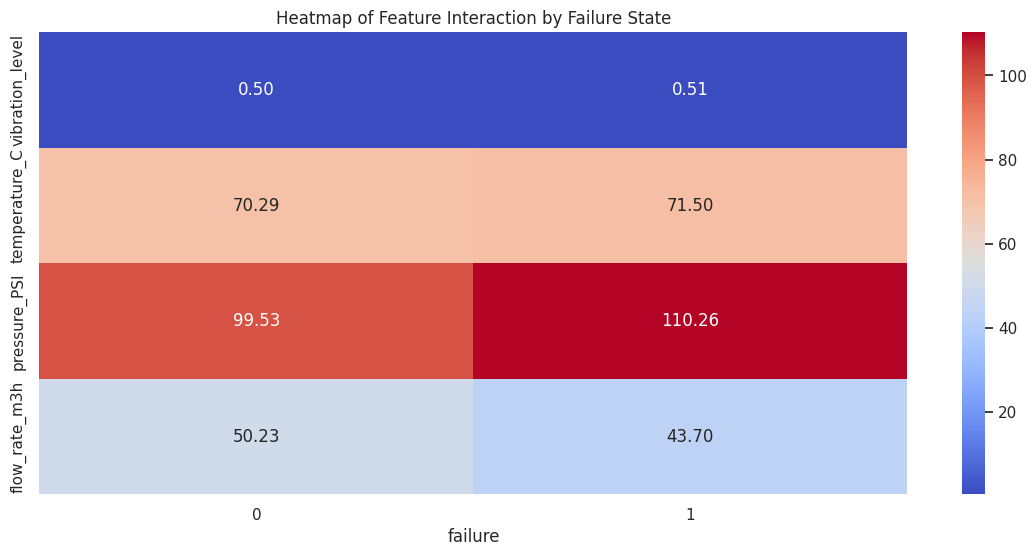

In [18]:
# 7. Heatmap of feature interaction by failure
plt.figure(figsize=(14, 6))
sns.heatmap(data.drop(columns=['timestamp']).groupby('failure').mean().T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Interaction by Failure State')
plt.show()



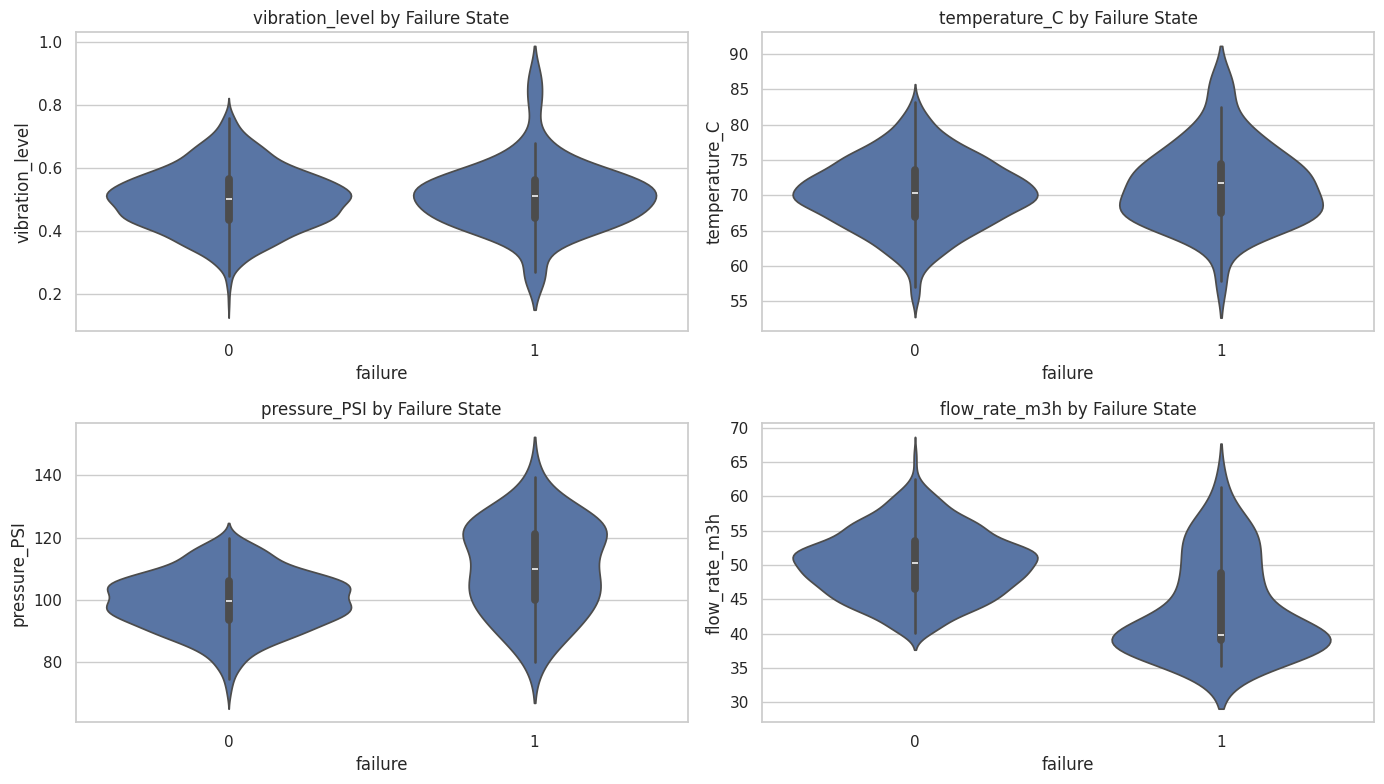

In [19]:
# 8. Violin plots for each feature by failure state
plt.figure(figsize=(14, 8))
for i, feature in enumerate(['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='failure', y=feature, data=data)
    plt.title(f'{feature} by Failure State')
plt.tight_layout()
plt.show()



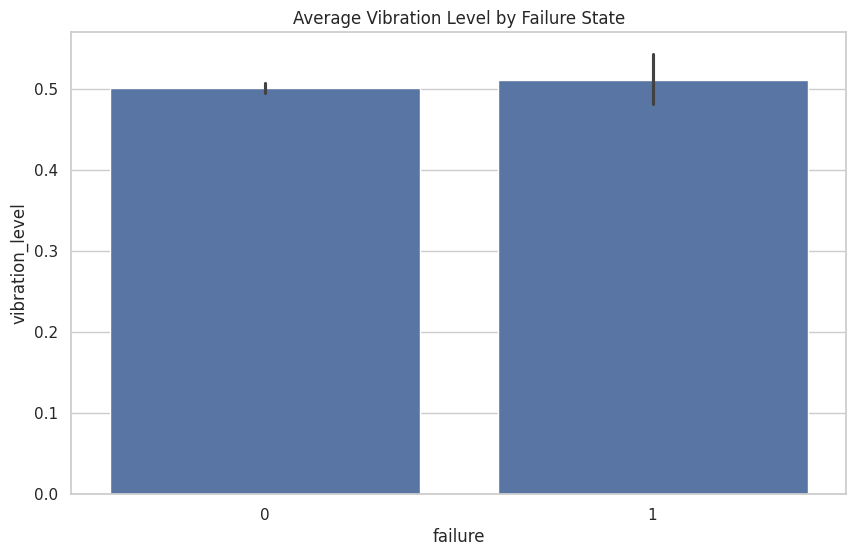

In [20]:
# 9. Bar plot of average values by failure state
plt.figure(figsize=(10, 6))
sns.barplot(x='failure', y='vibration_level', data=data)
plt.title('Average Vibration Level by Failure State')
plt.show()



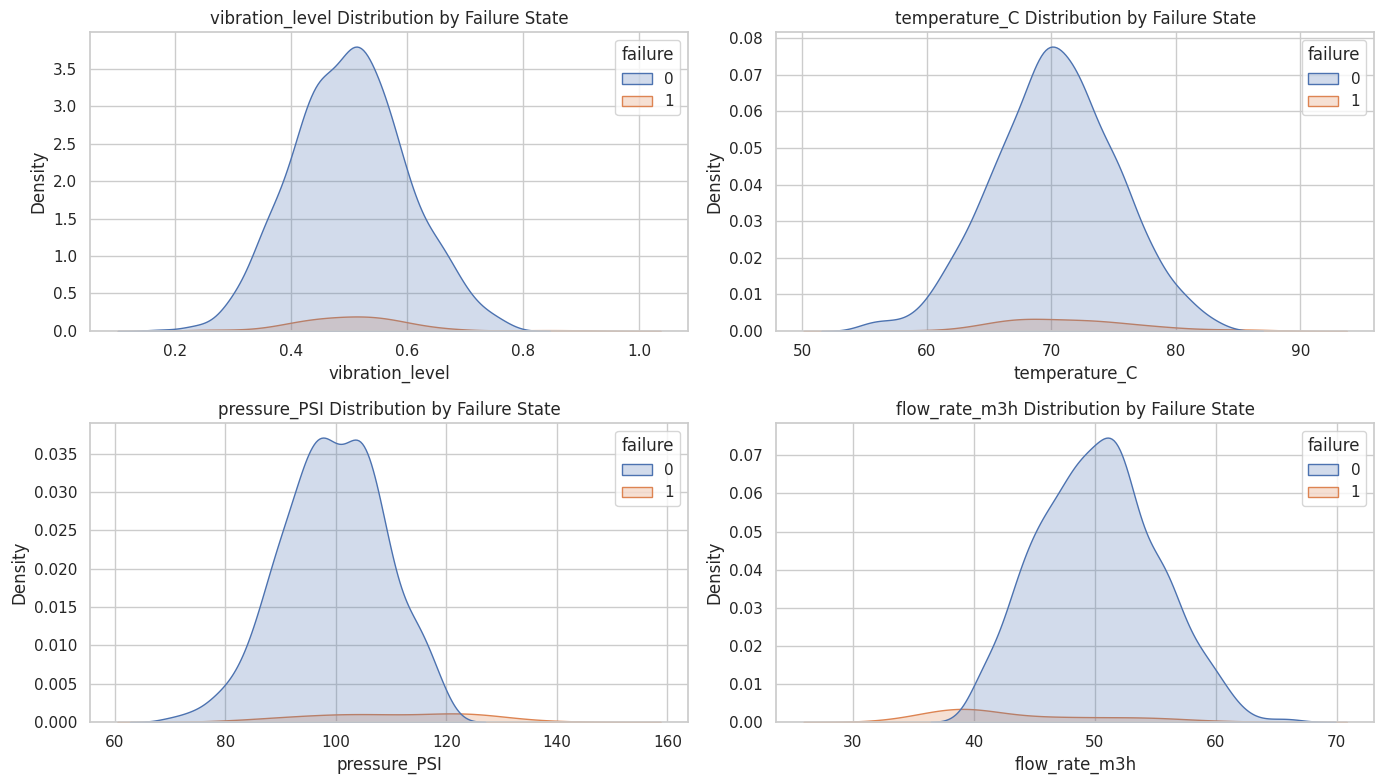

In [21]:
# 10. KDE plots to explore the distribution of features by failure state
plt.figure(figsize=(14, 8))
for i, feature in enumerate(['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=data, x=feature, hue="failure", fill=True)
    plt.title(f'{feature} Distribution by Failure State')
plt.tight_layout()
plt.show()



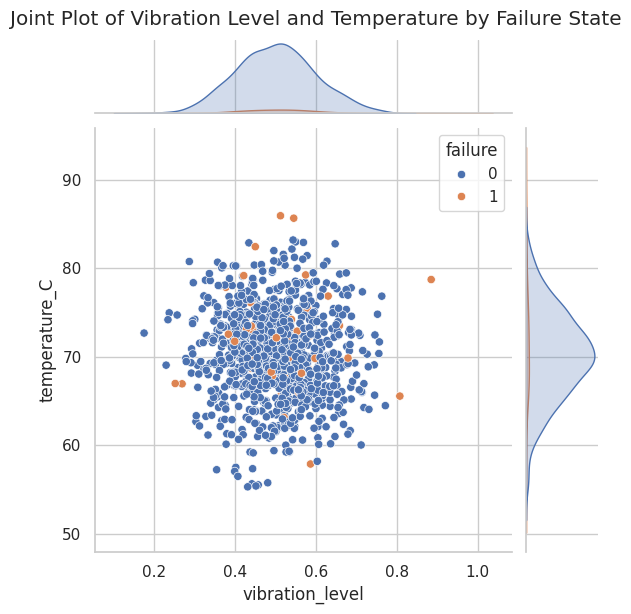

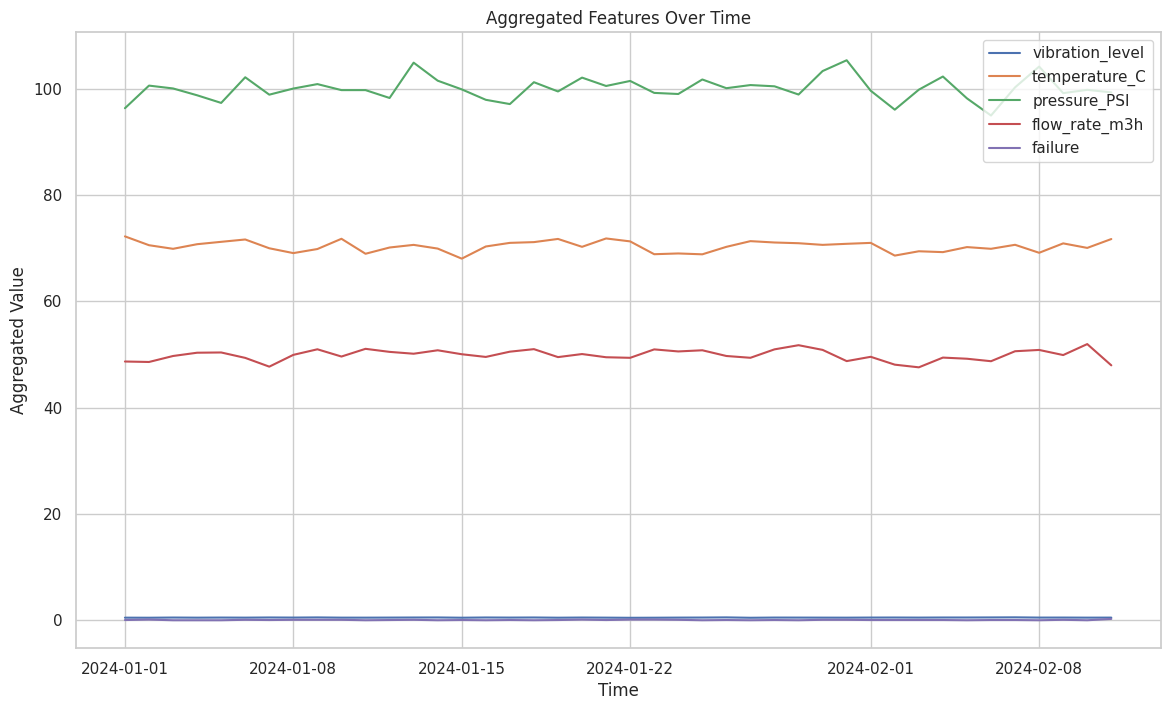

In [22]:
# 11. Joint plots for bivariate distributions and relationships
sns.jointplot(x="vibration_level", y="temperature_C", data=data, kind="scatter", hue="failure")
plt.suptitle("Joint Plot of Vibration Level and Temperature by Failure State", y=1.02)
plt.show()

# 12. Line plots of aggregated features over time
data['timestamp'] = pd.to_datetime(data['timestamp'])
data_agg = data.set_index('timestamp').resample('D').mean()
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_agg, dashes=False)
plt.title('Aggregated Features Over Time')
plt.xlabel('Time')
plt.ylabel('Aggregated Value')
plt.show()


## Splitting Data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data_scaled.drop(columns=['timestamp', 'failure'])
y = data_scaled['failure']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Verify the split and scaling
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)


(((800, 4), (200, 4)), ((800,), (200,)))

Applying 2 Machine Learning Models i.e. Random Forest and  Logistic Regression


## Applying Grid Search Methodology for Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Random Forest model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_de

In [25]:
# Use the best model from grid search to make predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]))



Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       190
           1       1.00      0.90      0.95        10

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       1.00      0.99      0.99       200

ROC AUC Score: 1.0


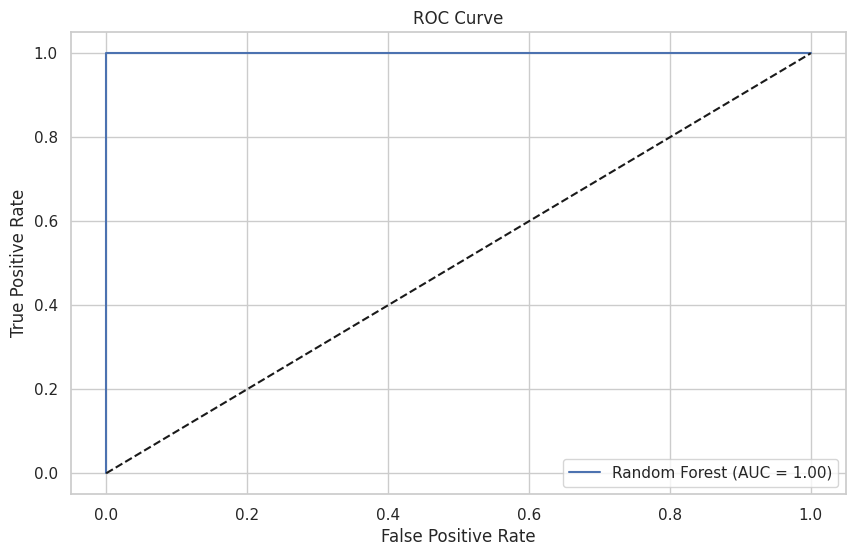

In [26]:
# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


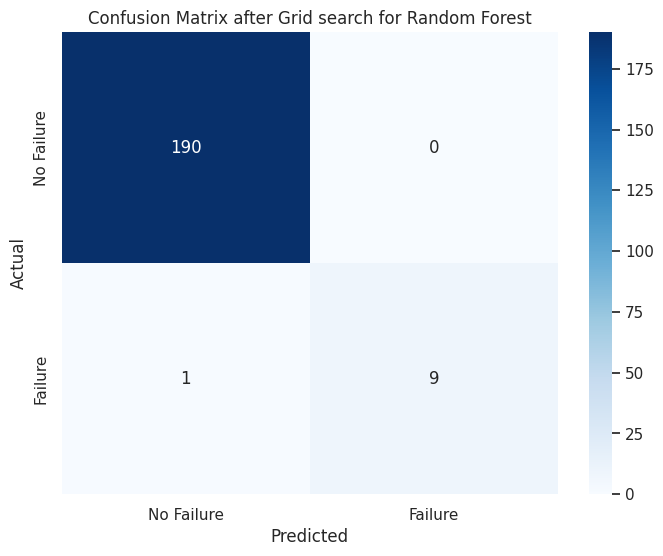

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Grid search for Random Forest')
plt.show()


## Applying Cross Validation for Random Forest Model after Grid search

In [28]:
# Cross-Validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {cv_scores.mean():.4f}')



Cross-Validation Accuracy Scores: [1.      0.99375 0.99375 0.99375 1.     ]
Average Cross-Validation Accuracy: 0.9962


## Grid Search for Logistic Regression Model

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV with the Logistic Regression model
grid_search_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000),
                              param_grid=param_grid_lr,
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the training data
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Cross-Validation Accuracy for Logistic Regression:", best_score_lr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, sol

In [30]:

# Use the best model from grid search to make predictions
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

# Evaluate the best model
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1]))



Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       190
           1       1.00      0.30      0.46        10

    accuracy                           0.96       200
   macro avg       0.98      0.65      0.72       200
weighted avg       0.97      0.96      0.96       200

ROC AUC Score: 0.9031578947368422


### Logistic Regression's Performance is not for Failure class as it has very few samples so recall is low for it.

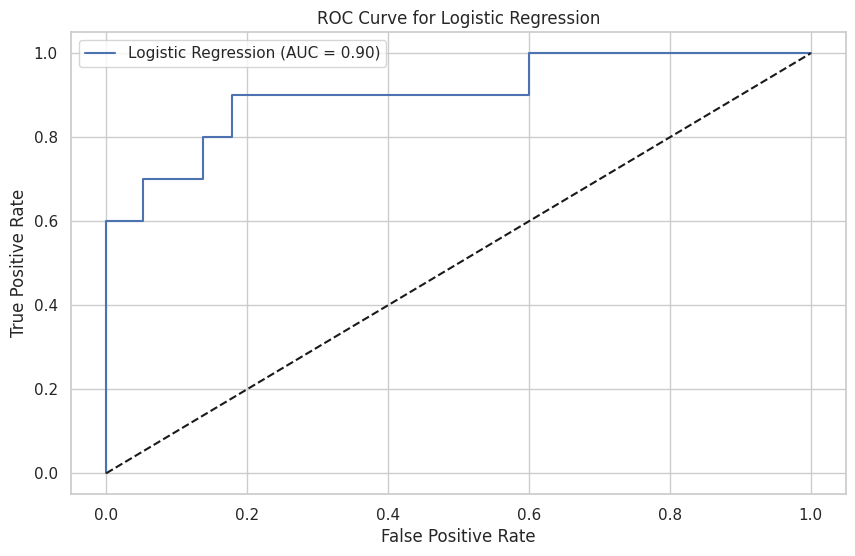

In [31]:
# Plot the ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1]):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='best')
plt.show()

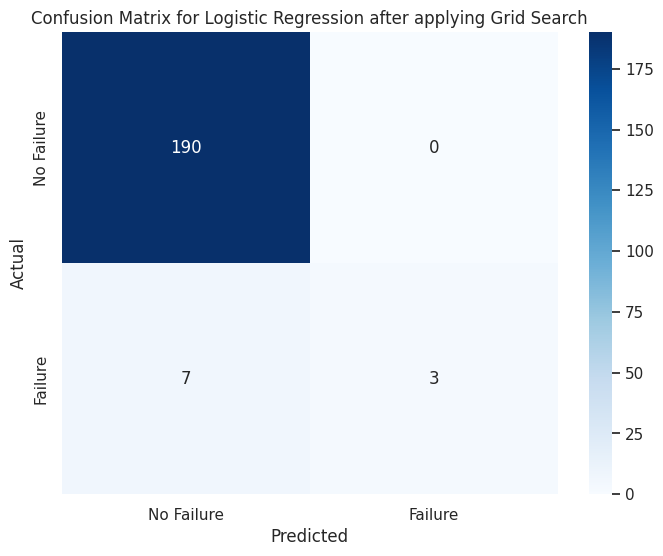

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression after applying Grid Search')
plt.show()


## Applying SVM using Grid Search

In [33]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
# Initialize models
svm_model = SVC()
gbc_model = GradientBoostingClassifier()

# Set up the parameter grid for both models
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

gbc_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

# svm_grid.best_params_, svm_accuracy, gbc_grid.best_params_, gbc_accuracy


## GridSearch with cross-validation for SVM


In [34]:
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)


# Predictions and accuracy for SVM
svm_predictions = svm_grid.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"\nSVM Accuracy: {svm_accuracy * 100:.2f} %")


SVM Accuracy: 97.00 %


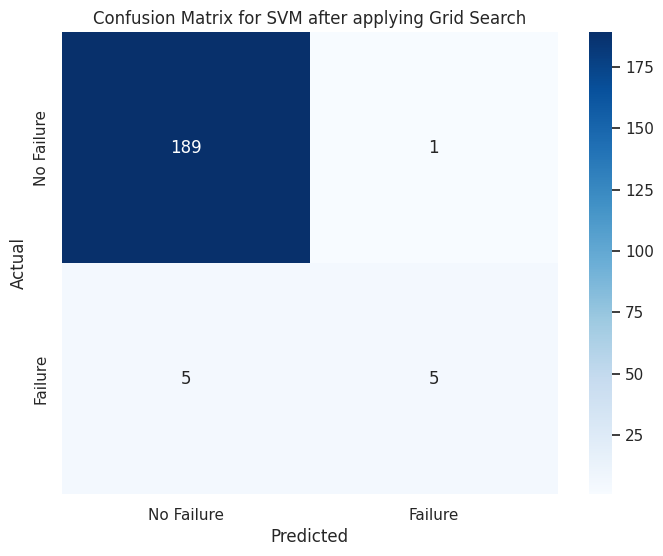

In [35]:
# Confusion matrix and classification report for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM after applying Grid Search')
plt.show()

In [36]:
svm_class_report = classification_report(y_test, svm_predictions)
print("Classification report for SVM:\n",svm_class_report)

Classification report for SVM:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       190
           1       0.83      0.50      0.62        10

    accuracy                           0.97       200
   macro avg       0.90      0.75      0.80       200
weighted avg       0.97      0.97      0.97       200



## GridSearch with cross-validation for Gradient Boosting Classifier


In [37]:
gbc_grid = GridSearchCV(gbc_model, gbc_param_grid, cv=5, scoring='accuracy')
gbc_grid.fit(X_train, y_train)
# Predictions and accuracy for Gradient Boosting Classifier
gbc_predictions = gbc_grid.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predictions)

In [38]:
print(f"Gradient Boosting Classifier Accuracy: {gbc_accuracy * 100:.2f} %")

Gradient Boosting Classifier Accuracy: 99.50 %


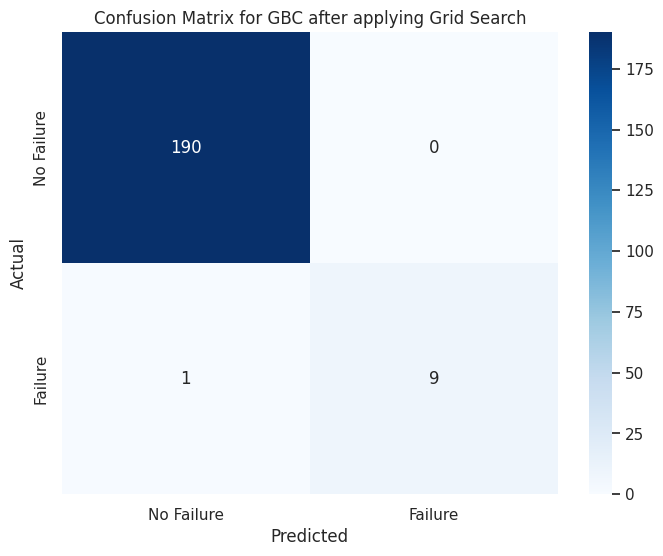

In [39]:
gbc_conf_matrix = confusion_matrix(y_test, gbc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(gbc_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GBC after applying Grid Search')
plt.show()

In [40]:
gbc_class_report = classification_report(y_test, gbc_predictions)

print("\nGradient Boosting Classifier Classification Report:")
print(gbc_class_report)



Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       190
           1       1.00      0.90      0.95        10

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       1.00      0.99      0.99       200



## ROC Curve for SVM and Gradient Boosting Classifier

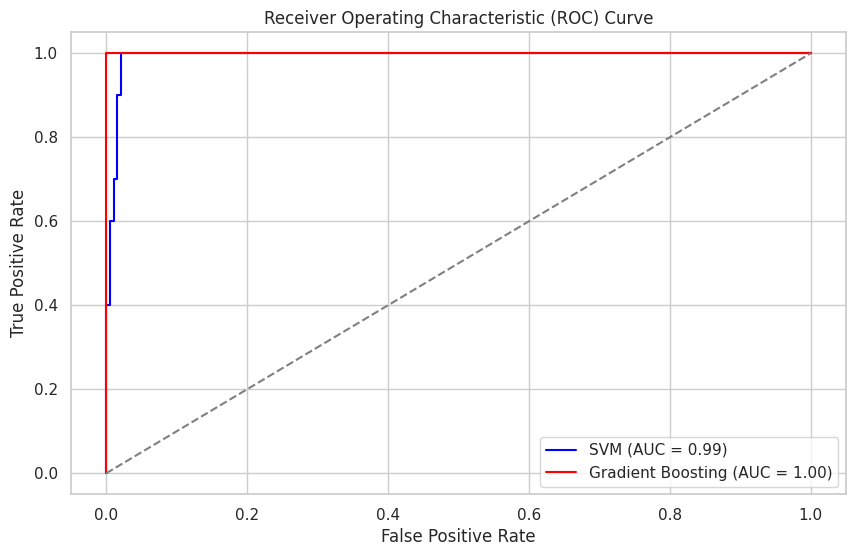

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# ROC curve for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_grid.decision_function(X_test))
svm_roc_auc = auc(svm_fpr, svm_tpr)

# ROC curve for Gradient Boosting Classifier
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_grid.predict_proba(X_test)[:, 1])
gbc_roc_auc = auc(gbc_fpr, gbc_tpr)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(svm_fpr, svm_tpr, color='blue', label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot(gbc_fpr, gbc_tpr, color='red', label=f'Gradient Boosting (AUC = {gbc_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Applying Multilayer Preceptron as well (Neural Network)

In [42]:
from sklearn.neural_network import MLPClassifier

# Simplifying the Neural Network model without GridSearch for faster execution
mlp_model_simple = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model
mlp_model_simple.fit(X_train, y_train)

# Predictions and accuracy for Neural Network
mlp_predictions_simple = mlp_model_simple.predict(X_test)
mlp_accuracy_simple = accuracy_score(y_test, mlp_predictions_simple)


In [43]:
print(f"MLP Accuracy is: {round(mlp_accuracy_simple*100,2)} %")

MLP Accuracy is: 97.5 %


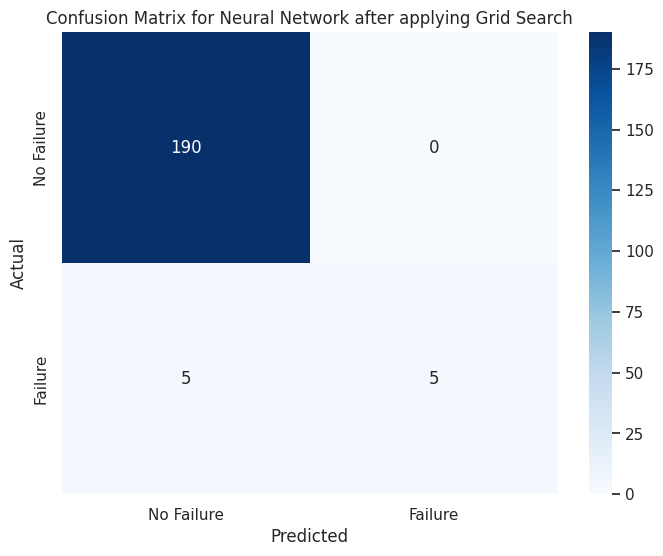

In [44]:
# Confusion matrix and classification report for Neural Network
mlp_conf_matrix_simple = confusion_matrix(y_test, mlp_predictions_simple)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix_simple, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network after applying Grid Search')
plt.show()

In [45]:
mlp_class_report_simple = classification_report(y_test, mlp_predictions_simple)
print("Neural Network Classifier Classification Report:")
print(mlp_class_report_simple)

Neural Network Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       190
           1       1.00      0.50      0.67        10

    accuracy                           0.97       200
   macro avg       0.99      0.75      0.83       200
weighted avg       0.98      0.97      0.97       200



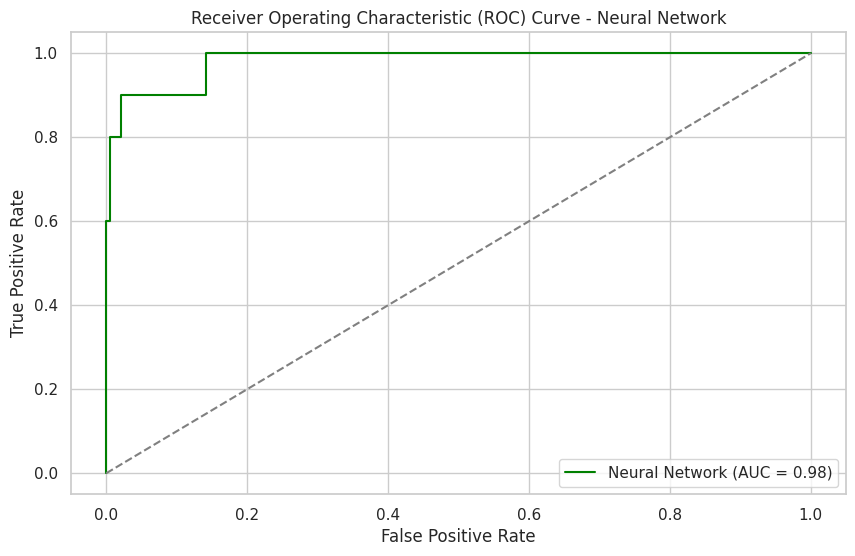

In [46]:
# ROC curve for Neural Network
mlp_fpr_simple, mlp_tpr_simple, _ = roc_curve(y_test, mlp_model_simple.predict_proba(X_test)[:, 1])
mlp_roc_auc_simple = auc(mlp_fpr_simple, mlp_tpr_simple)

# Plotting the ROC curve for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(mlp_fpr_simple, mlp_tpr_simple, color='green', label=f'Neural Network (AUC = {mlp_roc_auc_simple:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()


Among All these models Random Forest and Gradient Boosting Classifier did performed well in terms of Precision and Recall (i.e. these are more important where we have inbalanced dataset like us i.e. failure class has very few samples then Normal Class)

## saving Model for Random Forest for prediction

In [47]:
import joblib
# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(best_rf_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to random_forest_model.pkl


## Saving Scaler Model as well i.e. it will be used to scale features to Standard Scaler

In [48]:
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")


Scaler saved to scaler.pkl


# Model Strengths, Limitations, and Improvement Suggestions
### Model Strengths:
- The model demonstrates high accuracy and ROC AUC, indicating strong performance in discriminating between pump failures and non-failures.
- High precision and recall for the majority class (No Failure).

### Limitations:
- The model may exhibit some overfitting, as indicated by the near-perfect training accuracy and slightly lower test accuracy.
- The minority class (Failure) may have lower recall, meaning the model might miss some failure cases.

### Potential Areas for Improvement:
- **Addressing Class Imbalance**: Consider using techniques like SMOTE, undersampling, or adjusting class weights to improve recall for the minority class.
- **Ensemble Methods**: Combine multiple models (e.g., Random Forest, Gradient Boosting) to reduce variance and improve generalization.
- **Feature Engineering**: Explore additional features or transformations that may better capture the patterns leading to pump failures.
- **Hyperparameter Tuning**: Further refinement of hyperparameters using techniques like RandomizedSearchCV or Bayesian Optimization.
"""


<!-- ### Model Strengths:
- The model demonstrates high accuracy and ROC AUC, indicating strong performance in discriminating between pump failures and non-failures.
- High precision and recall for the majority class (No Failure).

### Limitations:
- The model may exhibit some overfitting, as indicated by the near-perfect training accuracy and slightly lower test accuracy.
- The minority class (Failure) may have lower recall, meaning the model might miss some failure cases.

### Potential Areas for Improvement:
- **Addressing Class Imbalance**: Consider using techniques like SMOTE, undersampling, or adjusting class weights to improve recall for the minority class.
- **Ensemble Methods**: Combine multiple models (e.g., Random Forest, Gradient Boosting) to reduce variance and improve generalization.
- **Feature Engineering**: Explore additional features or transformations that may better capture the patterns leading to pump failures.
- **Hyperparameter Tuning**: Further refinement of hyperparameters using techniques like RandomizedSearchCV or Bayesian Optimization. -->

## Exploring Dependence of Different Features on Pump Failure

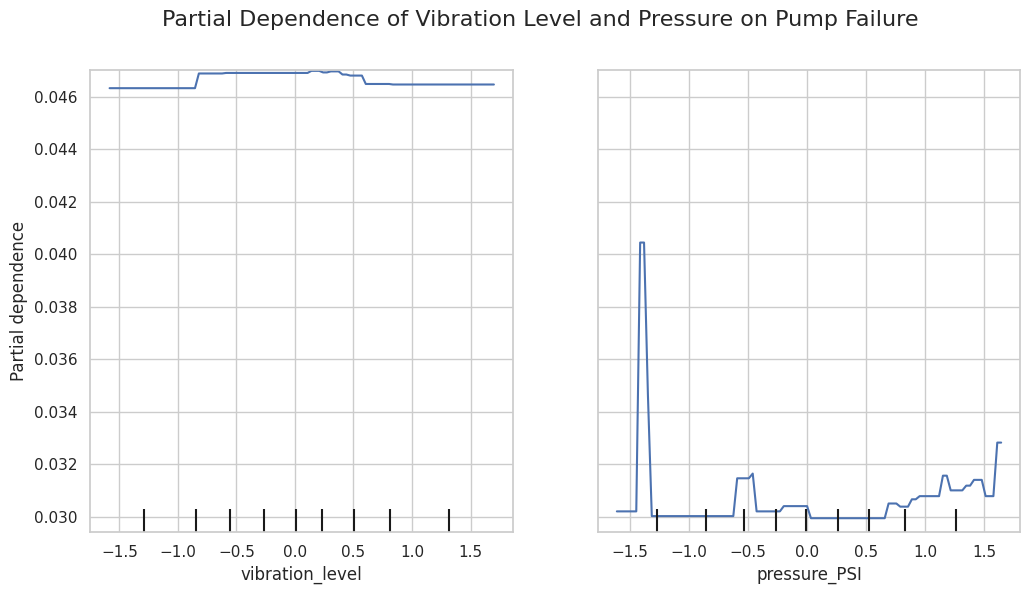

In [49]:
from sklearn.inspection import PartialDependenceDisplay

# Partial Dependence Plot for 'vibration_level' and 'pressure_PSI'
features = ['vibration_level', 'pressure_PSI']

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(best_rf_model, X, features, ax=ax)
plt.suptitle('Partial Dependence of Vibration Level and Pressure on Pump Failure', fontsize=16)
plt.show()


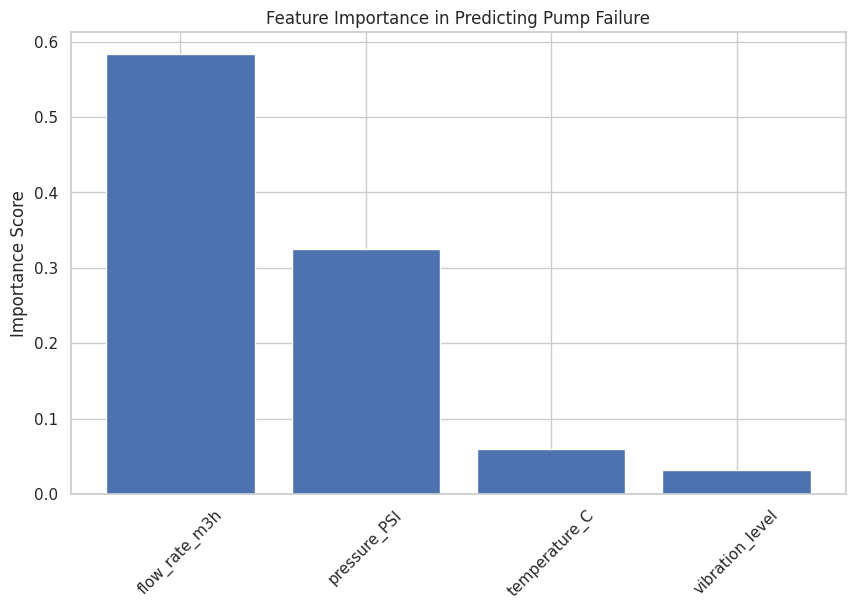

In [50]:
import numpy as np

# Feature Importance Visualization
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Predicting Pump Failure")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.ylabel("Importance Score")
plt.show()
